# Konstitutivní zákony

Konstitutivní zákony jsou zákony definující vztah mezi stavovou veličinou a jejím tokem. Můžeme si představit například teplotu a tok tepla. Tato představa je nejnázornjěší, ale mohla by být matoucí, protože teplota je intenzivní veličina a veličina, které se přesunuje tokem, není teplota, ale energie. Proto si místo toho můžeme představit i něco jiného. Nabízí se například množství vody. Pokud volíme pomalu tekoucí vodu, představme si například vodu v prostředí, ve kterém se může pohybovat, ale tento pohyb je pomalý. Nejčastěji si jako konkrétní model představujeme vlhkostní pole ve dřevě, nebo hladinu podzemní vody v půdě. To by pro nás mohly být vhodné materiálové realizace obecných myšlenek. 

Tok přenášené veličiny souvisí s tím, jak nerovnoměrně je rozložena tato veličina v prostoru. Pokud je množství veličiny ve všech bodech stejné, k toku nedochází. (V přípatě teploty, která je intenzivní veličinou, pochopitelně nemluvíme o množství teploty v bodě, ale o teplotě v bodě. U množství vody v bodě máme na mysli hustotu vody, tj. obsah vody v jednotce objemu, jednotce plochy nebo jednotce délky, podle dimenzionality úlohy.)

* Pokud mají všechny části tělesa stejnou teplotu, nedochází v tělese k toku tepla. Nemůže se část tělesa samovolně ohřát a druhá ochladit.
* Pokud mají všechny části tělesa stejný obsah vody, nedochází v tělese k přenosu vody difuzním tokem. Voda se samovolně nezačne koncentrovat v jednom místě více, než v místě jiném.

Pro pochopení souvislosti mezi stavovou veličinou a jejím tokem nejprve musíme mít míru udávající nerovnoměrnost rozložení stavové veličiny v prostoru. To bude veličina měřící intenzitu podnětu, který spouští tok.

## Gradient

Gradient skalární funkce dvou proměnných $f(x,y)$ je vektorové pole označené a definované vztahem 
$$\nabla f=\begin{pmatrix}\frac{\partial f}{\partial
  x}\cr \frac{\partial f}{\partial y}\end{pmatrix}.$$

Gradient skalární veličiny $f$ je vektorová veličina, která vyjadřuje směr a intenzitu maximálního růstu veličiny $f$. Přesněji, výsledkem gradientu je vektor ve směru maximálního růstu veličiny $f$. Délka tohoto vektoru je nárůst veličiny $f$ na intervalu jednotkové délky. Pro rovnoměrně rozloženou veličinu  v prostoru (konstantní) je gradient nulový. Proto je možné gradient chápat jako míru nerovnoměrného rozložení veličiny v prostoru. Řada fyzikálních dějů probíhá tak, že tato nerovnoměrnost vyvolá proudění, které se snaží tuto nerovnoměrnost vyrovnat, například vedení tepla nebo difuze. V praxi nás proto většinou zajímá směr maximálního poklesu, tj. $-\nabla f$.

Pokud je gradient teploty v rovině v bodě $(1,1)$ dán vektorem  $$\nabla T(1,1)=\begin{pmatrix}1 \cr -2\end{pmatrix}{}^{\circ}\mathrm C \mathrm m^{-1}, $$  znamená to, že v tomto bodě roste teplota ve směru osy $x$ rychlostí $1$ stupeň Celsia na každý metr délky a ve směru osy $y$ klesá rychlostí $2$ stupně Celsia na každý metr délky. Vektor definovaný tímto gradientem má směr doprava dolů (pod úhlem splňujícím podmínku $\tan \varphi = -2$) a délku $\sqrt{(1)^2+(-2)^2}=\sqrt 5\approx 2.2$. To znamená, že maximální nárůst teploty je směrem doprava dolů a tento nárůst je $2.2$ stupně Celsia na každý metr délky. Nakreslíme si rozložení teploty a gradient. Všímejme si, že šipky míří vždy směrem, kterým nejrychleji roste teplota, což poznáme podle barev na "termosnímku".







In [1]:
import numpy                     # knihovna na numerické výpočty (goniomerické funkce, gradient, 2D mřížka a dělení intervalu, ...)
import scipy.integrate           # knihovna na technické výpočty (integrál)
import matplotlib.pyplot as plt  # knihovna na kreslení

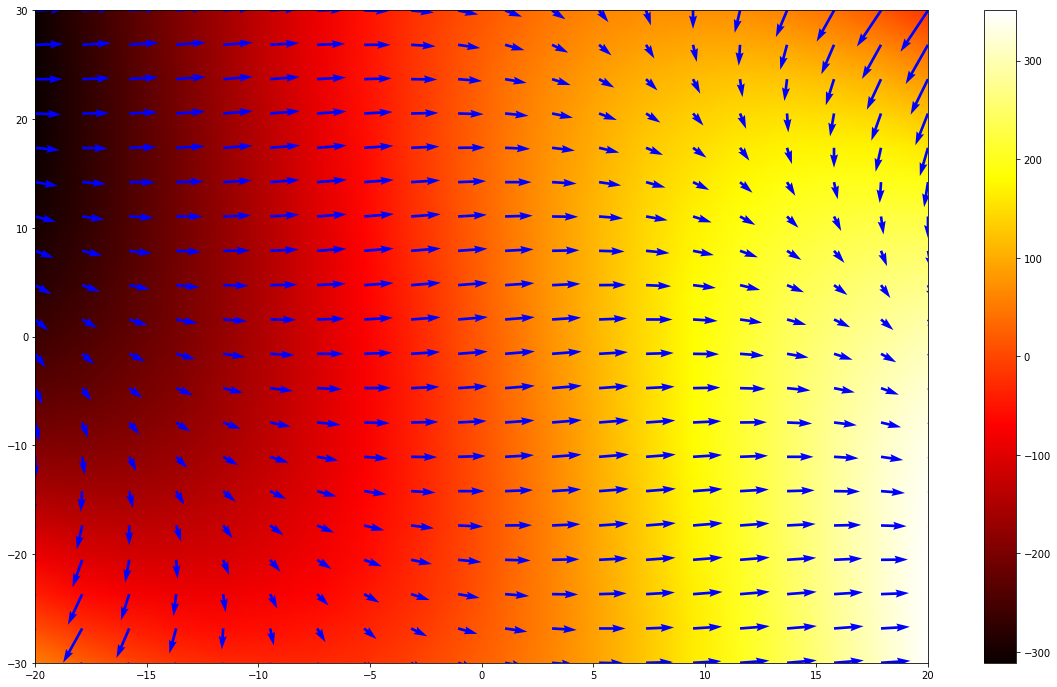

In [82]:
def teplota (x,y): 
  return 20+18*x-0.01*(x+0.5*y)**3+1*y

y, x = numpy.mgrid[-30:30:20j, -20:20:20j]    # mrizka pro kresleni gradientu a barevne mapy funkce dvou promennych
z = teplota(x, y)                             # výpočet teploty na mřížce
grady, gradx = numpy.gradient(z)              # gradient teploty

fig = plt.figure(figsize=(20,12))             # inicializace grafiky

## Vykreslení teploty a gradientu teploty
cmap = plt.get_cmap('hot')                     # nastaveni schema pro barevnou mapu
output = plt.pcolormesh(x, y, z, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output)                           # barevný sloupec s hodnotami vedle grafu
plt.quiver(x, y, gradx, grady, color='blue')   # vykreslení toku
ax.set_aspect(1) 
None


## Tok v izotropním materiálu (keramika, kov)

Nerovnoměrnost v rozložení teploty popsaná v předchozím odstavci bude tvořit hnací faktor snažící se hnát teplo opačným směrem. Bude to opravdu směr toku? Pokud bude materiál izotropní (bude mít ve všech směrech stejné vlastnosti), jako například kov nebo keramika, je odpověď na tuto otázku kladná. Teplo bude mít tendenci téct na opačnou stranu, doleva nahoru. Jak intenzivní tok tepla bude závisí na materiálu. Jinak to dopadne pro měď a jinak pro keramiku. Může to dopadnout například takto.





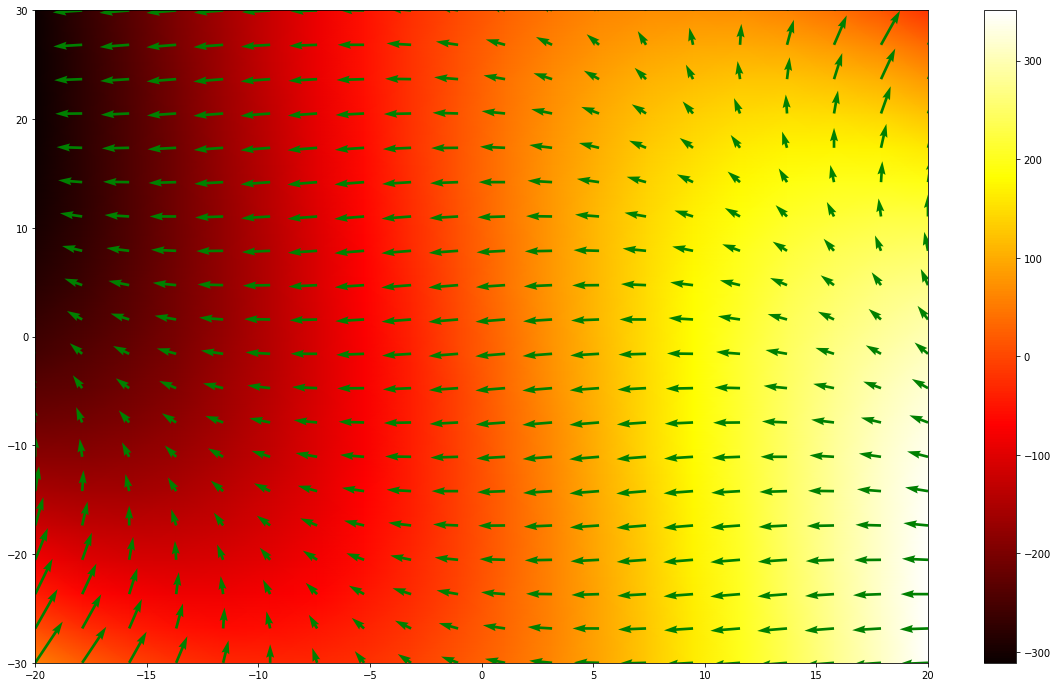

In [81]:
tokx = -gradx
toky = -grady

fig = plt.figure(figsize=(20,12))   # inicializace grafiky
plt.quiver(x, y, gradx, grady, color='blue') 
output = plt.pcolormesh(x, y, z, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
plt.colorbar(output)                           # barevný sloupec s hodnotami vedle grafu
plt.quiver(x, y, tokx, toky, color='green')    # vykreslení toku
#plt.quiver(x, y, gradx, grady, color='lightblue')    # vykreslení gradientu
ax.set_aspect(1) 
None

# Tok v ortotropním materiálu (dřevo)

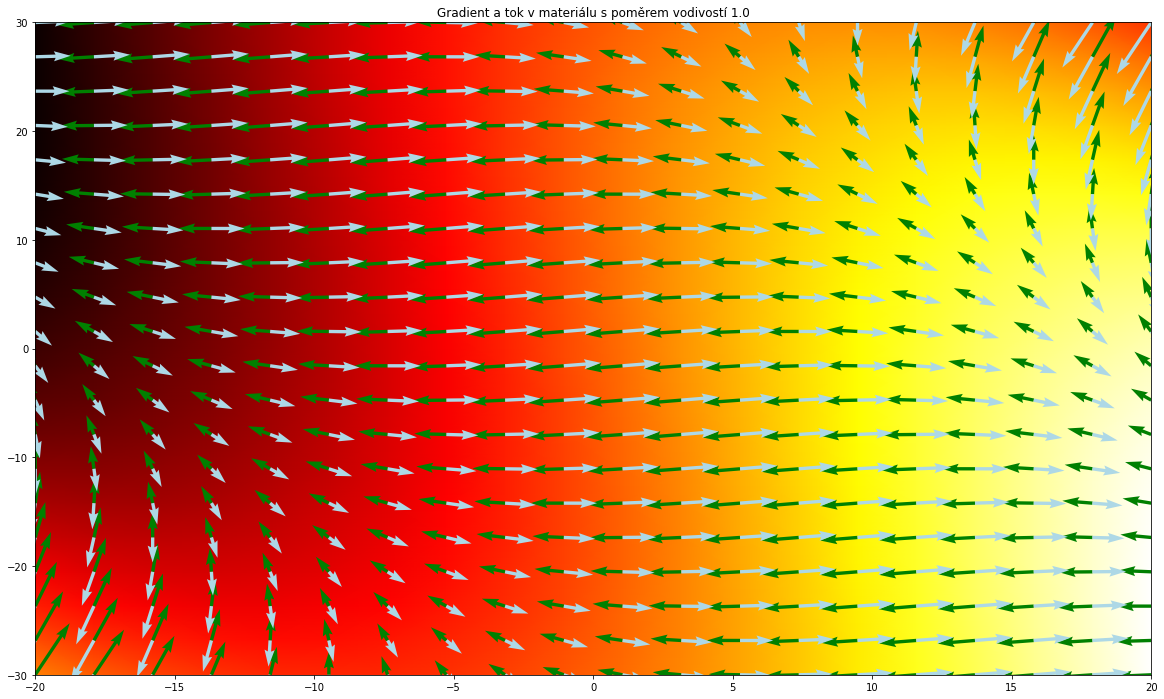

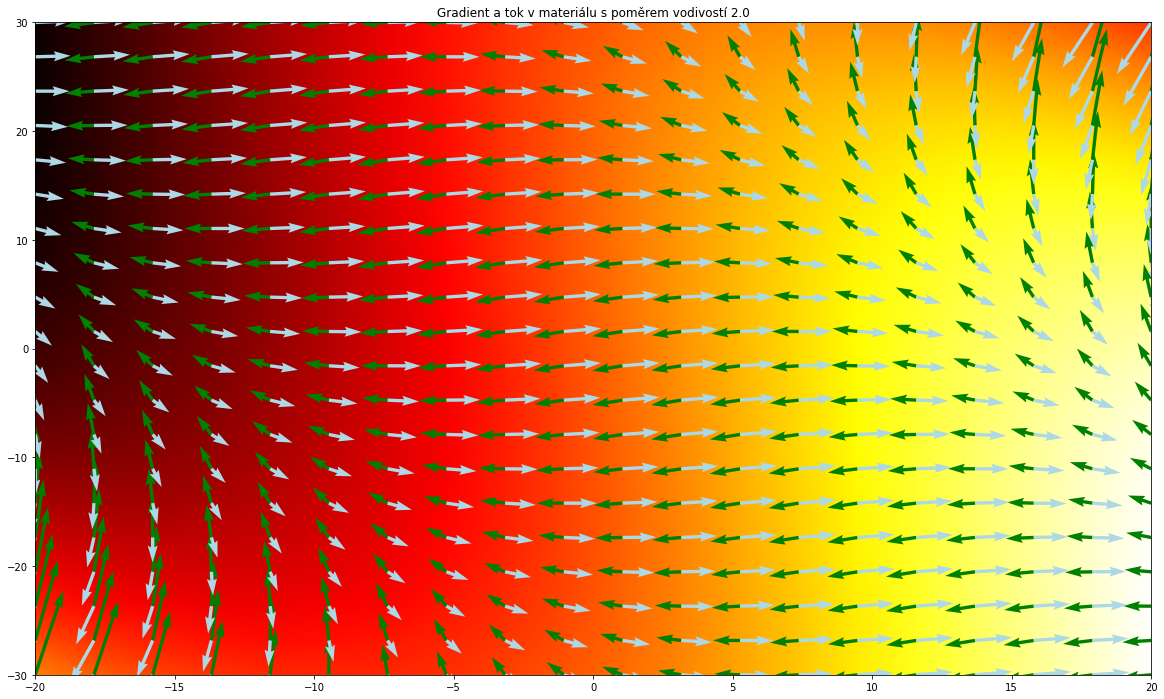

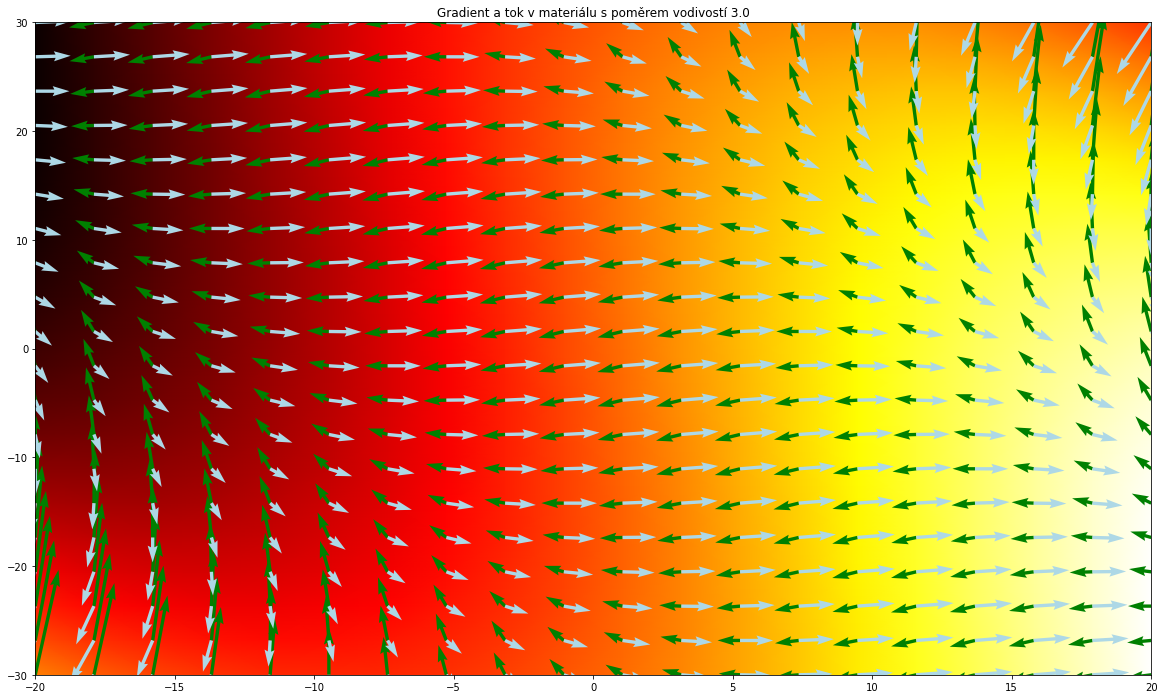

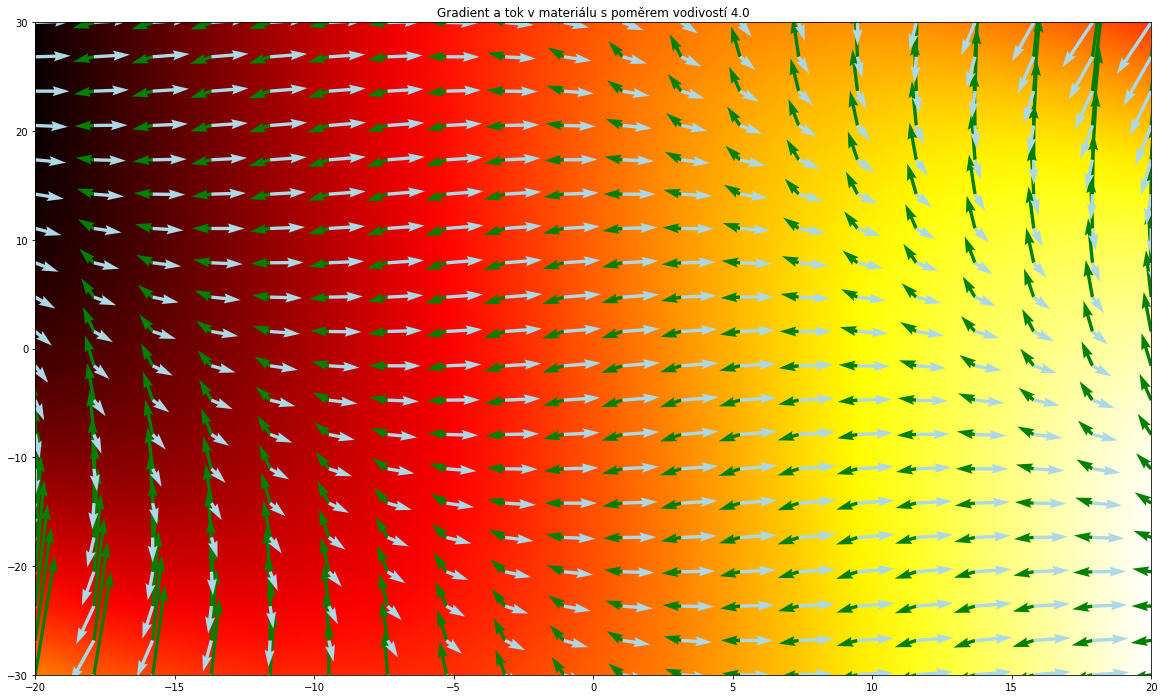

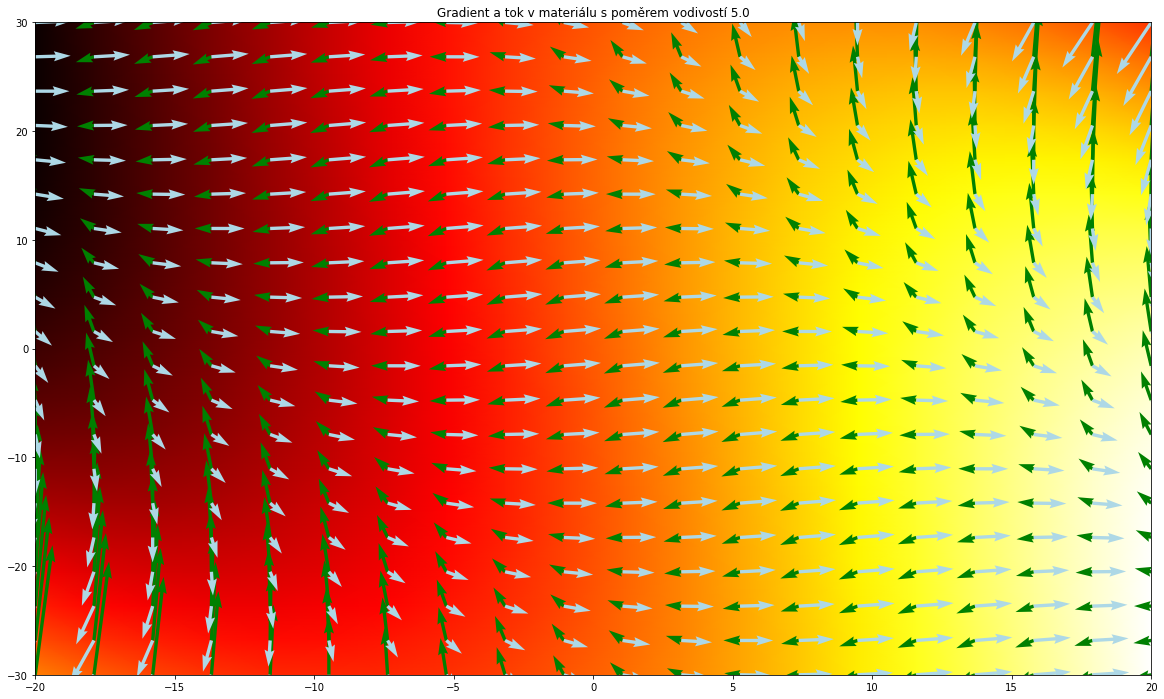

In [83]:

for d in numpy.linspace(1,5,5):
  D=numpy.array([[1,0],[0,d]])
  tokx,toky = -D[0,0]*gradx - D[0,1]*grady, -D[1,0]*gradx - D[1,1]*grady, 
  fig = plt.figure(figsize=(20,12))   # inicializace grafiky
  plt.quiver(x, y, gradx, grady, color='blue') 
  output = plt.pcolormesh(x, y, z, cmap=cmap, shading='gouraud') # vykresleni barevne mapy pomocí zvolené barevné mapy a vyhlazování přechodů
  #fig.colorbar(output)                           # barevný sloupec s hodnotami vedle grafu
  plt.quiver(x, y, tokx, toky, color='green')    # vykreslení toku
  plt.quiver(x, y, gradx, grady, color='lightblue')    # vykreslení gradientu
  plt.title("Gradient a tok v materiálu s poměrem vodivostí %s"%str(d))
  ax.set_aspect(1) 

None